# Minimal Proteomics Analysis - EISAI Pilot Study

Streamlined analysis workflow with essential steps and visualizations.

In [16]:
# =============================================================================
# PROTEOMICS ANALYSIS CONFIGURATION
# =============================================================================

# =============================================================================
# 1. INPUT FILES AND PATHS
# =============================================================================
toolkit_path = "."  # Path to the proteomics toolkit
metadata_file = "example_data/2025-6-CSF-Total-Pilot-MetaData.csv"  # Sample metadata file
protein_file = "example_data/2025-6-CSF-Total-Pilot-ProteinQuant.csv"  # Protein quantitation file

# Sample processing options
remove_common_prefix = True  # Clean up sample names by removing common prefixes/suffixes

# =============================================================================
# 2. DATA FILTERING PARAMETERS
# =============================================================================
# Data filtering - proteins must be detected in at least this fraction of samples
min_detection_rate = 0.5  # 0.5 = 50% detection rate required

# =============================================================================
# 3. NORMALIZATION STRATEGY
# =============================================================================
# Normalization method - Select ONE:
#   "Median" - Simple median normalization (preserves original scale, good for most data)
#   "VSN" - Variance Stabilizing Normalization (handles heteroscedastic data, produces negative values)
#   "Quantile" - Makes sample distributions identical (strong assumption)
#   "MAD" - Median Absolute Deviation (robust to outliers)
#   "Z-score" - Standardizes to mean=0, std=1
#   "RLR" - Robust Linear Regression (good for batch effects)
#   "LOESS" - Locally weighted regression (intensity-dependent bias)
#   "None" - No normalization applied
normalization_method = "Median"

# VSN-specific settings (only used if normalization_method = "VSN")
optimize_vsn = False  # Use parameter optimization for VSN (True for final analysis, False for speed)

# =============================================================================
# 4. NEGATIVE VALUE HANDLING STRATEGY
# =============================================================================
# VSN normalization produces negative values - this is NORMAL and EXPECTED
# For CSF biomarker studies, negative values should typically be KEPT
handle_negatives = False  # Set to False to keep VSN negative values (RECOMMENDED)

# If handle_negatives = True, choose method (ignored when handle_negatives = False):
#   "keep" - Keep all negative values as-is
#   "min_positive" - Replace negatives with fraction of smallest positive value
#   "nan" - Replace negatives with NaN (missing values)
#   "zero" - Replace negatives with zero
negative_handling_method = "min_positive"
min_positive_replacement = None  # If None, uses 1/10th of smallest positive value

# =============================================================================
# 5. LOG TRANSFORMATION FOR STATISTICAL ANALYSIS
# =============================================================================
# CRITICAL: Some normalization methods preserve linear scale, but statistical tests
# assume log-transformed data for proper fold change interpretation

# Log transformation control:
#   "auto" - Automatically detect if log transformation is needed based on normalization method
#   True - Always apply log2 transformation before statistical analysis  
#   False - Never apply log transformation (use only if data is already log-transformed)
log_transform_before_stats = "auto"  # RECOMMENDED: "auto"

# Log transformation settings (only used if log transformation is applied):
log_base = "log2"  # Options: "log2", "log10", "ln" - log2 recommended for proteomics
log_pseudocount = None  # Auto-calculated small value to handle zeros (or set manually, e.g., 1e-6)

# =============================================================================
# 6. STATISTICAL ANALYSIS STRATEGY
# =============================================================================
# Statistical test method - Select ONE:
#   "mixed_effects" - Mixed-effects model with interactions (RECOMMENDED for complex designs)
#   "paired_t" - Paired t-test (simple before/after comparison)
#   "paired_welch" - Paired Welch's t-test (more robust than paired_t)
#   "welch_t" - Welch's t-test (unpaired groups)
#   "student_t" - Student's t-test (unpaired, equal variances)
#   "mann_whitney" - Mann-Whitney U test (non-parametric, unpaired)
#   "wilcoxon" - Wilcoxon signed-rank test (non-parametric, paired)
statistical_test_method = "mixed_effects"

# Analysis type (for simple tests only - ignored by mixed_effects)
#   "paired" - For paired/matched samples (same subjects at different timepoints)
#   "unpaired" - For independent groups (different subjects)
analysis_type = "paired"

# =============================================================================
# 7. EXPERIMENTAL DESIGN CONFIGURATION
# =============================================================================
# Subject identification and pairing
subject_column = "Subject"      # Column in metadata containing subject/patient IDs
paired_column = "Visit"         # Column with timepoints/conditions for pairing
paired_label1 = "D-02"          # Baseline/reference timepoint
paired_label2 = "D-13"          # Follow-up/comparison timepoint

# Group comparison setup - DOSE-RESPONSE ANALYSIS
group_column = "DrugDose"       # Use DrugDose as the main grouping variable
group_labels = ["0", "20", "40", "80"]  # Dose groups to compare

# DrugDose treatment method - CATEGORICAL vs CONTINUOUS
FORCE_CATEGORICAL = False  # Set to True to treat DrugDose as categorical factors
                          # Set to False to treat DrugDose as continuous numeric variable

# =============================================================================
# 8. MIXED-EFFECTS MODEL CONFIGURATION (for statistical_test_method = "mixed_effects")
# =============================================================================
# Mixed-effects model configuration (used when statistical_test_method = "mixed_effects")
interaction_terms = ["DrugDose", "Visit"]  # Test: Do different doses respond differently over time?

# Additional interactions (optional)
additional_interactions = []  # e.g., ["DrugDose", "Age"] for dose-age interactions

# Covariates to control for (optional)
# These must be columns in your metadata file
covariates = []  # e.g., ["Age", "BMI", "Sex"] - numerical or categorical variables

# =============================================================================
# 9. SIGNIFICANCE THRESHOLDS
# =============================================================================
# Significance thresholds
p_value_threshold = 0.05     # P-value threshold for significance
fold_change_threshold = 1.5  # Minimum fold change threshold (linear scale)
q_value_max = 0.1           # FDR threshold

# P-value selection for volcano plot and significance testing
# Options: "adjusted" (use FDR-corrected p-values) or "unadjusted" (use raw p-values)
use_adjusted_pvalue = "adjusted"  # "adjusted" or "unadjusted"

# Auto-fallback: If no significant results with adjusted p-values, try unadjusted
enable_pvalue_fallback = True  # Set to False to disable automatic fallback

# =============================================================================
# 10. QUALITY CONTROL AND VISUALIZATION SETTINGS
# =============================================================================
# Quality control samples identification
control_column = "Subject"      # Column containing control sample designations
control_labels = ["HoofPool", "GWPool", "EISAIPool"]  # Labels identifying QC/control samples

# Visualization settings
use_systematic_colors = True  # Use systematic color palette for consistent plotting
systematic_color_palette = "Set1"  # Color palette for groups

# =============================================================================
# 11. OUTPUT AND EXPORT SETTINGS
# =============================================================================
# Output file prefix - all exported files will start with this name
output_prefix = "EISAI-Minimal-Analysis"

# Export settings
export_results = True
label_top_proteins = 25  # Number of proteins to label in volcano plot and output

# Technical settings
random_seed = 42
min_samples_per_group = 3

print(f"✓ Configuration loaded: {normalization_method} normalization, {statistical_test_method} analysis")
print(f"  Analysis design: {group_column} comparison ({len(group_labels)} groups)")
if group_column == "DrugDose" or any(label.replace('.','').isdigit() for label in group_labels):
    print(f"  Variable treatment: {'CATEGORICAL (factors)' if FORCE_CATEGORICAL else 'CONTINUOUS (numeric)'}")
else:
    print(f"  Variable treatment: CATEGORICAL (factors)")
if statistical_test_method == "mixed_effects":
    print(f"  Mixed-effects interactions: {interaction_terms}")
    if covariates:
        print(f"  Covariates: {covariates}")
print(f"  P-value selection: {use_adjusted_pvalue}")

✓ Configuration loaded: Median normalization, mixed_effects analysis
  Analysis design: DrugDose comparison (4 groups)
  Variable treatment: CONTINUOUS (numeric)
  Mixed-effects interactions: ['DrugDose', 'Visit']
  P-value selection: adjusted


In [17]:
# Import libraries and toolkit
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sys.path.insert(0, toolkit_path)
import proteomics_toolkit as ptk
print("✓ Libraries and toolkit imported")

✓ Libraries and toolkit imported


In [18]:
# 1. Data Import
protein_data, metadata, peptide_data = ptk.load_skyline_data(
    protein_file=protein_file,
    metadata_file=metadata_file,
    peptide_file=None
)

print(f"✓ Data loaded: {protein_data.shape[0]} proteins, {metadata.shape[0]} samples")
display(metadata.head())
display(protein_data.iloc[:5, :8])

=== LOADING SKYLINE DATA ===

✓ Loaded protein data: (1600, 51)
✓ Loaded metadata: (48, 8)

Data loading completed successfully!
✓ Data loaded: 1600 proteins, 48 samples


,Replicate,Sample Type,Analyte Concentration,Group,Comparison,DrugDose,Subject,Visit
0,Total-PTE01-511-84A-C4-049,Unknown,NaN,80 mg D-02,Drug,80.0,84,D-02
1,Total-PTE02-Hoof18-050,Quality Control,NaN,NaN,NaN,NaN,HoofPool,NaN
2,Total-PTE03-304-75B-B4-051,Unknown,NaN,80 mg D-13,Drug,80.0,75,D-13
3,Total-PTE04-450-08A-C7-052,Unknown,NaN,Placebo D-02,Placebo,0.0,08,D-02
4,Total-PTE05-051-21B-D6-053,Unknown,NaN,20 mg D-13,Drug,20.0,21,D-13


,Protein,Protein Description,Protein Gene,Total-PTE01-511-84A-C4-049 Sum Normalized Area,Total-PTE02-Hoof18-050 Sum Normalized Area,Total-PTE03-304-75B-B4-051 Sum Normalized Area,Total-PTE04-450-08A-C7-052 Sum Normalized Area,Total-PTE05-051-21B-D6-053 Sum Normalized Area
0,sp|O43240|KLK10_HUMAN,Kallikrein-10 OS=Homo sapiens OX=9606 GN=KLK10...,KLK10,3767.2,6.089500e+02,4267.8,1513.50,1058.9
1,sp|P02787|TRFE_HUMAN,Serotransferrin OS=Homo sapiens OX=9606 GN=TF ...,TF,122350000.0,1.983900e+08,143160000.0,91009000.00,49228000.0
2,sp|P06858|LIPL_HUMAN,Lipoprotein lipase OS=Homo sapiens OX=9606 GN=...,LPL,1731.2,3.298600e+03,1705.8,3940.50,1063.3
3,sp|P51149|RAB7A_HUMAN,Ras-related protein Rab-7a OS=Homo sapiens OX=...,RAB7A,1428.3,2.291800e+02,1411.8,228.27,0.0
4,sp|P51693|APLP1_HUMAN,Amyloid beta precursor like protein 1 OS=Homo ...,APLP1,3334200.0,6.711000e+06,6511000.0,5358900.00,3727900.0


In [19]:
# 2. Sample Processing
# Extract sample columns
metadata_sample_names = metadata.iloc[:, 0].tolist()
protein_columns = protein_data.columns.tolist()

sample_columns = []
for col in protein_columns:
    if any(sample_name in col or col.startswith(sample_name) for sample_name in metadata_sample_names):
        sample_columns.append(col)

# Clean sample names
cleaned_sample_names_dict = ptk.data_import.clean_sample_names(
    sample_columns,
    auto_detect=True
)

protein_data = protein_data.rename(columns=cleaned_sample_names_dict)
final_sample_columns = list(cleaned_sample_names_dict.values())

# Create sample metadata mapping
sample_metadata = {}
original_sample_names = metadata.iloc[:, 0].tolist()

for i, original_name in enumerate(original_sample_names):
    if original_name.startswith('Total-PT'):
        core_part = original_name[8:]
        for cleaned_name in final_sample_columns:
            if core_part in cleaned_name:
                row_data = metadata.iloc[i].to_dict()
                metadata_dict = {k: v for k, v in row_data.items() if k != metadata.columns[0]}
                sample_metadata[cleaned_name] = metadata_dict
                break

# Classify samples
group_distribution, control_samples, study_samples, sample_metadata, group_colors = ptk.classify_samples(
    sample_metadata=sample_metadata,
    group_column=group_column,
    group_labels=group_labels,
    control_column=control_column,
    control_labels=control_labels,
    apply_systematic_colors=True
)

print(f"✓ Sample processing complete: {len(final_sample_columns)} samples, {len(sample_metadata)} with metadata")

Auto-detected common prefix: 'Total-PT'
Auto-detected common suffix: 'Sum Normalized Area'
SAMPLE CLASSIFICATION SUMMARY
Total samples: 48
Control samples: 12
Study samples: 36

SAMPLE DISTRIBUTION:
  0: 10 samples (Study Group)
  20: 8 samples (Study Group)
  40: 8 samples (Study Group)
  80: 10 samples (Study Group)
  HoofPool: 4 samples (Study Group)
  GWPool: 4 samples (Study Group)
  EISAIPool: 4 samples (Study Group)

CONFIGURATION:
  Study groups from column: 'DrugDose' -> ['0', '20', '40', '80']
  Control identification: 'Subject' -> ['HoofPool', 'GWPool', 'EISAIPool']

STUDY GROUP VERIFICATION:
  0: 10 samples
  20: 8 samples
  40: 8 samples
  80: 10 samples

Samples are now properly classified for analysis and visualization

AUTOMATIC SYSTEMATIC COLOR ASSIGNMENT
High-contrast systematic color assignments:
  0: 10 samples (color: #1f77b4) (Study)
  20: 8 samples (color: #1f77b4) (Study)
  40: 8 samples (color: #1f77b4) (Study)
  80: 10 samples (color: #1f77b4) (Study)
  EISAIP

In [20]:
# 3. Data Preprocessing
processed_data = ptk.preprocessing.parse_protein_identifiers(protein_data)
processed_data = ptk.preprocessing.parse_gene_and_description(processed_data)

ptk.preprocessing.assess_data_completeness(processed_data, final_sample_columns, sample_metadata)

filtered_data = ptk.preprocessing.filter_proteins_by_completeness(
    processed_data, final_sample_columns, min_detection_rate
)

print(f"✓ Preprocessing complete: {len(filtered_data)} proteins after filtering")
display(filtered_data[['Protein', 'UniProt_Accession', 'Gene', 'Description']].head())

=== PARSING PROTEIN IDENTIFIERS ===

Total proteins: 1600
Accessions extracted: 1598 (99.9%)
Database identified: 1526 (95.4%)
Database distribution: {'SwissProt': np.int64(1516), '': np.int64(74), 'TrEMBL': np.int64(10)}
=== PARSING GENE NAMES AND DESCRIPTIONS ===

Found existing gene column: 'Protein Gene' - using as primary Gene source
Supplementing 7 missing genes from description parsing...
Cleaning descriptions from column: 'Protein Description'

Final results:
Gene names available: 1593 (99.6%)
Descriptions cleaned: 1600 (100.0%)
=== ASSESSING DATA COMPLETENESS ===

Data completeness summary:
Total possible values: 76,800
Non-null values: 76,800 (100.0%)
Non-zero values: 74,384 (96.9%)

Per-sample completeness:
E01-511-84A-C4-049: 1573/1600 non-zero (98.3%) - Group: 80
E02-Hoof18-050: 1587/1600 non-zero (99.2%) - Group: HoofPool
E03-304-75B-B4-051: 1577/1600 non-zero (98.6%) - Group: 80
E04-450-08A-C7-052: 1574/1600 non-zero (98.4%) - Group: 0
E05-051-21B-D6-053: 1536/1600 non-z

,Protein,UniProt_Accession,Gene,Description
0,sp|O43240|KLK10_HUMAN,O43240,KLK10,Kallikrein-10
1,sp|P02787|TRFE_HUMAN,P02787,TF,Serotransferrin
2,sp|P06858|LIPL_HUMAN,P06858,LPL,Lipoprotein lipase
3,sp|P51149|RAB7A_HUMAN,P51149,RAB7A,Ras-related protein Rab-7a
4,sp|P51693|APLP1_HUMAN,P51693,APLP1,Amyloid beta precursor like protein 1


Debug: Group order: [0, 20, 40, 80, 'HoofPool', 'GWPool', 'EISAIPool']
Debug: samples_by_group keys: [80, 'HoofPool', 0, 20, 40, 'EISAIPool', 'GWPool']
Debug: Total samples to plot: 48
Debug: Final arrays lengths - box_data: 48, positions: 48, colors: 48, labels: 48


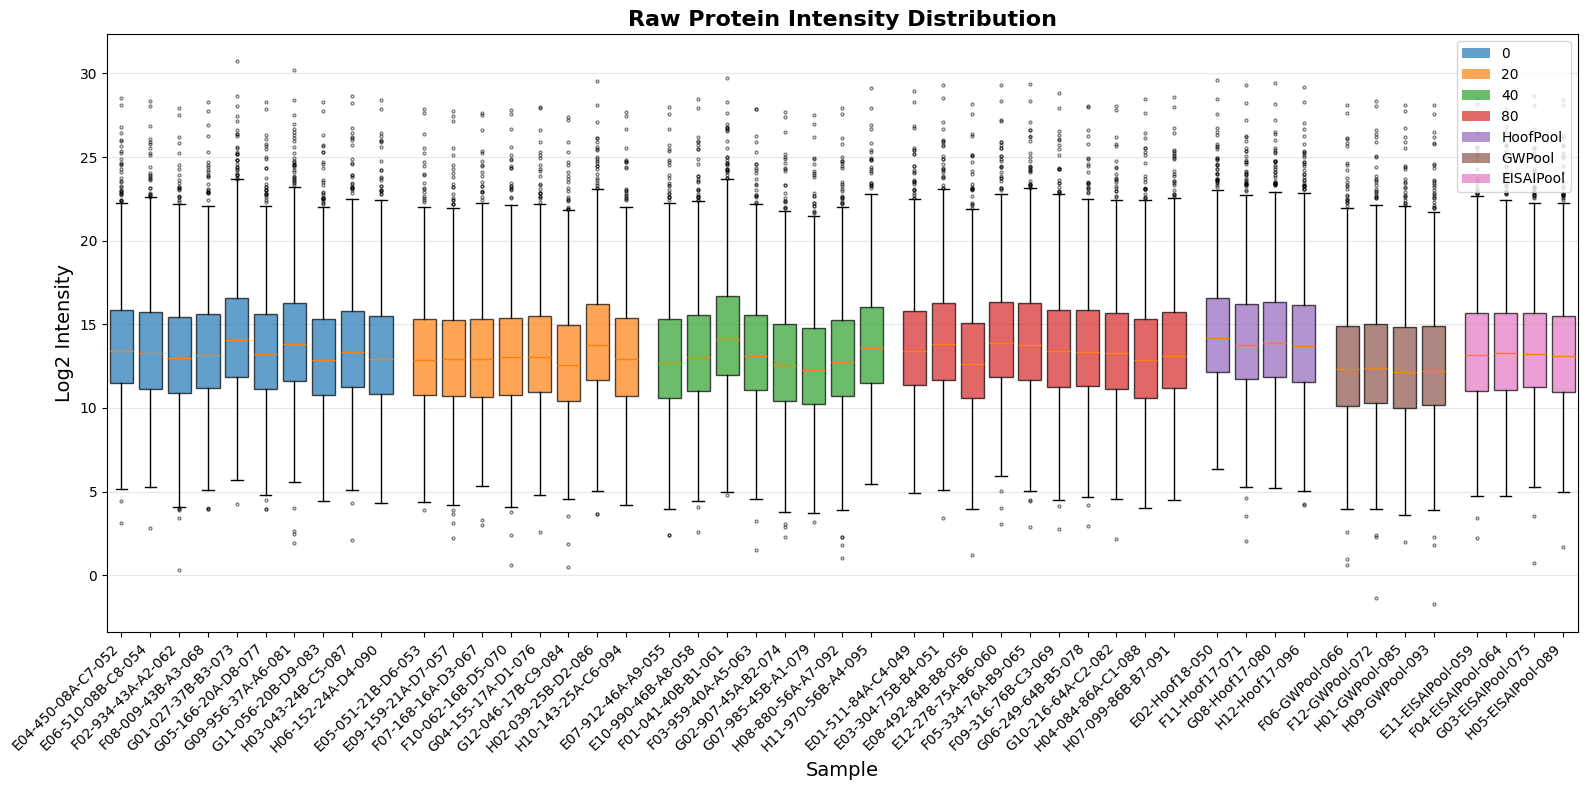

Box plot summary:
Total samples plotted: 48
Average proteins per sample: 1543


In [21]:
# 4. Raw Data Visualization
ptk.visualization.plot_box_plot(
    data=filtered_data,
    sample_columns=final_sample_columns,
    sample_metadata=sample_metadata,
    group_colors=group_colors,
    group_order=list(group_distribution.keys()),
    log_transform=True,
    title="Raw Protein Intensity Distribution"
)

=== CREATING STANDARD DATA STRUCTURE ===

Found 48 sample columns
Sample column range: E01-511-84A-C4-049 ... H12-Hoof17-096
Applying cleaned sample names...

Final structure verification:
Total columns: 53
Annotation columns (1-5): ['Protein', 'Description', 'Protein Gene', 'UniProt_Accession', 'UniProt_Entry_Name']
Sample columns (48): E01-511-84A-C4-049 ... H12-Hoof17-096
✅ Data structure standardization complete!
Applying median normalization...
Median normalization completed for 48 samples
✓ Median normalization complete


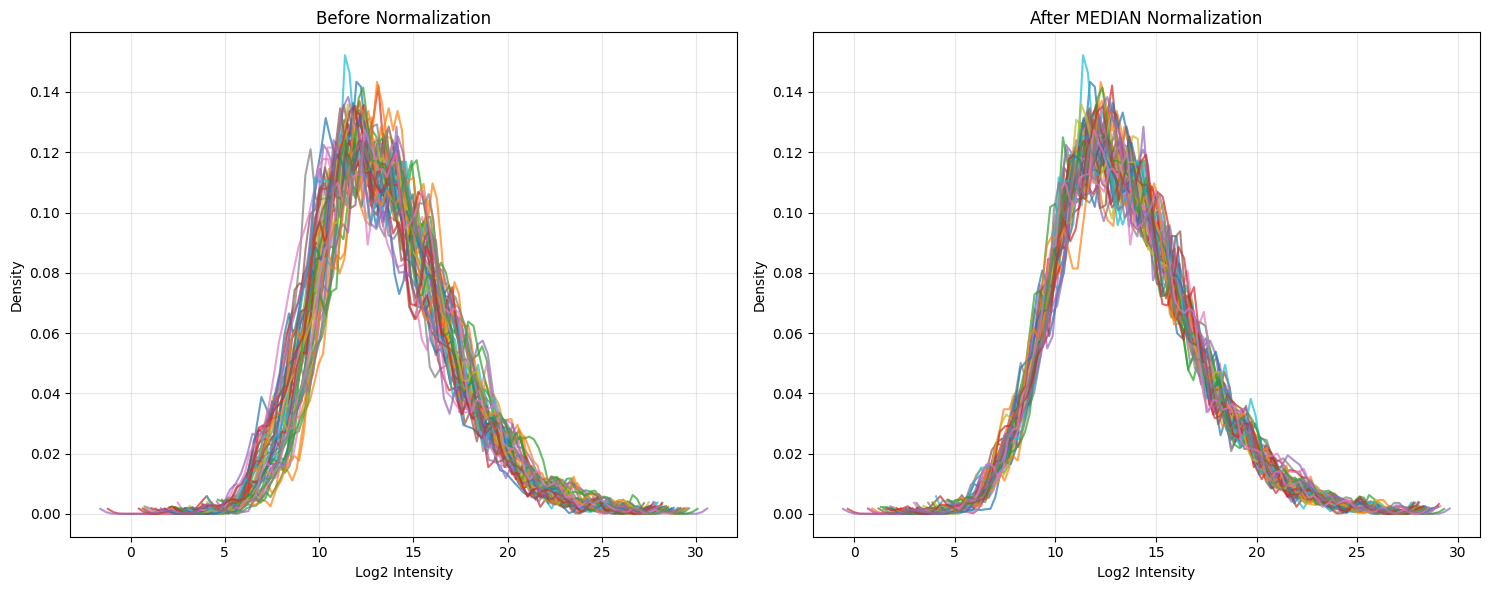

Normalization comparison (MEDIAN):
Original median range: 2.000
Normalized median range: 0.366
Range reduction: 81.7%


In [ ]:
# 5. Data Normalization
standardized_data = ptk.preprocessing.create_standard_data_structure(
    data=filtered_data,
    cleaned_sample_names=cleaned_sample_names_dict
)

print(f"Applying {normalization_method} normalization...")

# Apply the selected normalization method
if normalization_method.lower() == 'median':
    normalized_data = ptk.normalization.median_normalize(standardized_data, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'vsn':
    normalized_data = ptk.normalization.vsn_normalize(standardized_data, optimize_params=optimize_vsn, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'quantile':
    normalized_data = ptk.normalization.quantile_normalize(standardized_data, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'mad':
    normalized_data = ptk.normalization.mad_normalize(standardized_data, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'z-score':
    normalized_data = ptk.normalization.z_score_normalize(standardized_data, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'rlr':
    normalized_data = ptk.normalization.rlr_normalize(standardized_data, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'loess':
    normalized_data = ptk.normalization.loess_normalize(standardized_data, sample_columns=final_sample_columns)
elif normalization_method.lower() == 'none':
    print("No normalization applied")
    normalized_data = standardized_data.copy()
else:
    raise ValueError(f"Unknown normalization method: {normalization_method}")

# Handle negative values if requested
if handle_negatives and normalization_method.lower() != 'none':
    normalized_data = ptk.normalization.handle_negative_values(
        data=normalized_data,
        method=negative_handling_method,
        min_positive_value=min_positive_replacement,
        sample_columns=final_sample_columns
    )

# Calculate detailed normalization statistics
if normalization_method.lower() != 'none':
    original_sample_data = standardized_data[final_sample_columns]
    normalized_sample_data = normalized_data[final_sample_columns]
    
    detailed_stats = ptk.normalization.calculate_detailed_normalization_stats(
        original_data=original_sample_data,
        normalized_data=normalized_sample_data, 
        method=normalization_method,
        sample_metadata=sample_metadata,
        control_labels=control_labels
    )
    
    overall = detailed_stats['overall']
    print(f"\n✓ {normalization_method} normalization complete")
    print(f"  Sample median range reduction: {overall['sample_median_range_reduction']*100:.1f}%")
    print(f"  CV change: {overall['normalized_cv_median_all_samples'] - overall['original_cv_median_all_samples']:+.3f}")

# Normalization comparison plot
if normalization_method.lower() != 'none':
    ptk.visualization.plot_normalization_comparison(
        original_data=standardized_data[final_sample_columns],
        normalized_data=normalized_data[final_sample_columns],
        sample_columns=final_sample_columns,
        method=normalization_method.upper()
    )

Creating normalized data visualizations...
Debug: Group order: [0, 20, 40, 80, 'HoofPool', 'GWPool', 'EISAIPool']
Debug: samples_by_group keys: [80, 'HoofPool', 0, 20, 40, 'EISAIPool', 'GWPool']
Debug: Total samples to plot: 48
Debug: Final arrays lengths - box_data: 48, positions: 48, colors: 48, labels: 48


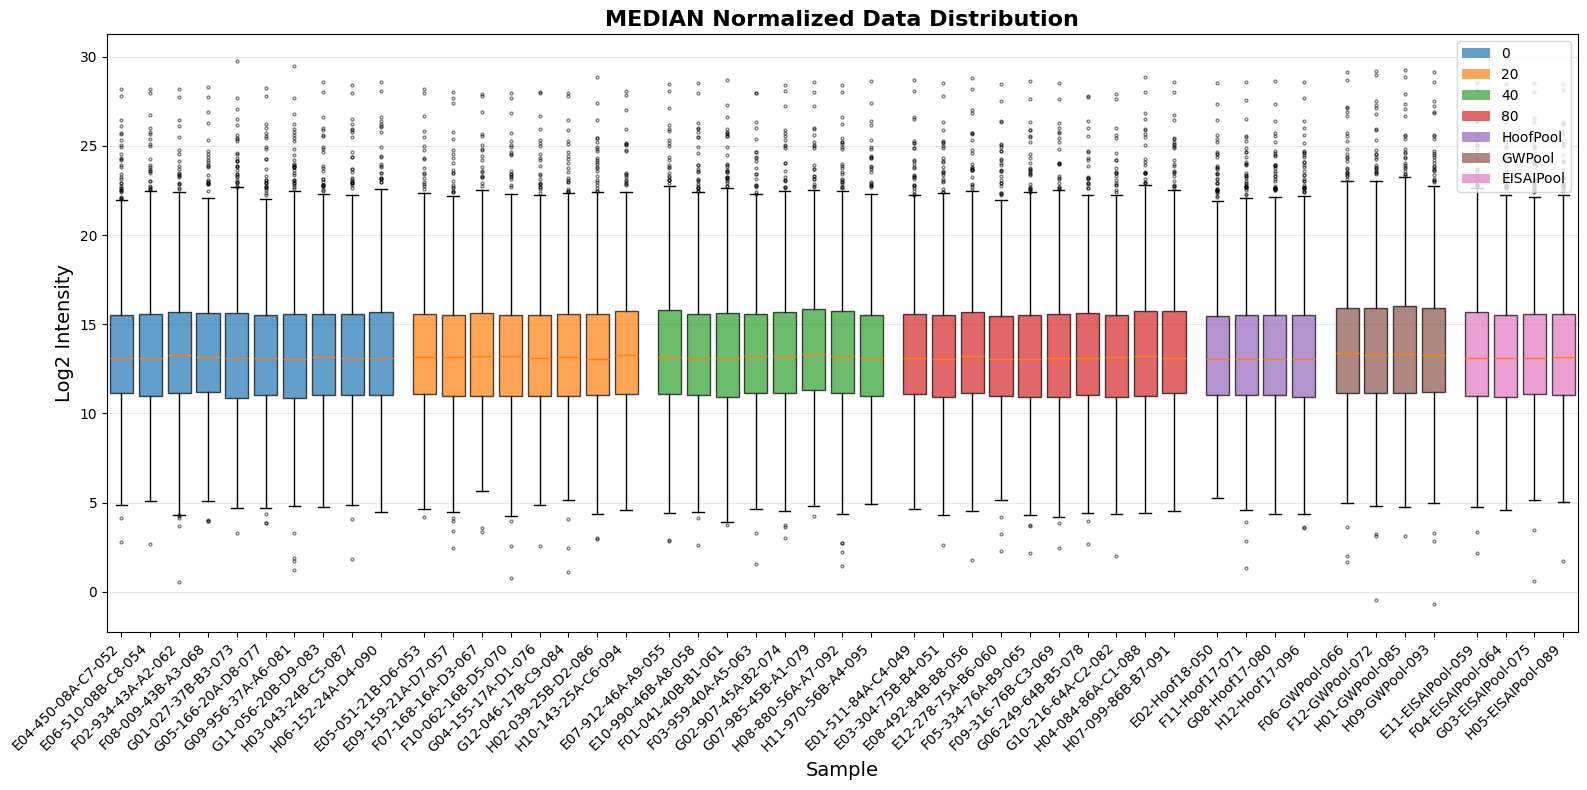

Box plot summary:
Total samples plotted: 48
Average proteins per sample: 1543
✓ Normalized data visualization complete


In [32]:
# 6. Normalized Data Visualization
print("Creating normalized data visualizations...")

# Box plot of normalized data
ptk.visualization.plot_box_plot(
    data=normalized_data,
    sample_columns=final_sample_columns,
    sample_metadata=sample_metadata,
    group_colors=group_colors,
    group_order=list(group_distribution.keys()),
    log_transform=(normalization_method.lower() != 'vsn'),  # VSN data is already log-transformed
    title=f"{normalization_method.upper()} Normalized Data Distribution"
)

# Analyze negative values if present (especially for VSN)
if normalization_method.lower() == 'vsn' or any(normalized_data[final_sample_columns].min() < 0):
    negative_analysis = ptk.analyze_negative_values(
        data=normalized_data,
        normalization_method=normalization_method,
        sample_columns=final_sample_columns
    )
    
    if negative_analysis['negative_count'] > 0:
        print(f"\n✓ Negative values detected: {negative_analysis['negative_count']} ({negative_analysis['negative_percentage']:.3f}%)")
        if normalization_method.lower() == 'vsn':
            print("  Note: Negative values from VSN are normal and expected")
    else:
        print("\n✓ No negative values detected")

print(f"✓ Normalized data visualization complete")

Applying median normalization...
Median normalization completed for 48 samples
Starting VSN normalization...
Applying VSN transformation to 48 samples...
Processing sample 1/48: E01-511-84A-C4-049
Processing sample 5/48: E05-051-21B-D6-053
Processing sample 10/48: E10-990-46B-A8-058
Processing sample 15/48: F03-959-40A-A5-063
Processing sample 20/48: F08-009-43B-A3-068
Processing sample 25/48: G01-027-37B-B3-073
Processing sample 30/48: G06-249-64B-B5-078
Processing sample 35/48: G11-056-20B-D9-083
Processing sample 40/48: H04-084-86A-C1-088
Processing sample 45/48: H09-GWPool-093
VSN transformation completed!
Performing comparative PCA analysis...
Using 1215 proteins for Original Data PCA
Using 1215 proteins for Median Normalized PCA
Using 1584 proteins for VSN Normalized PCA


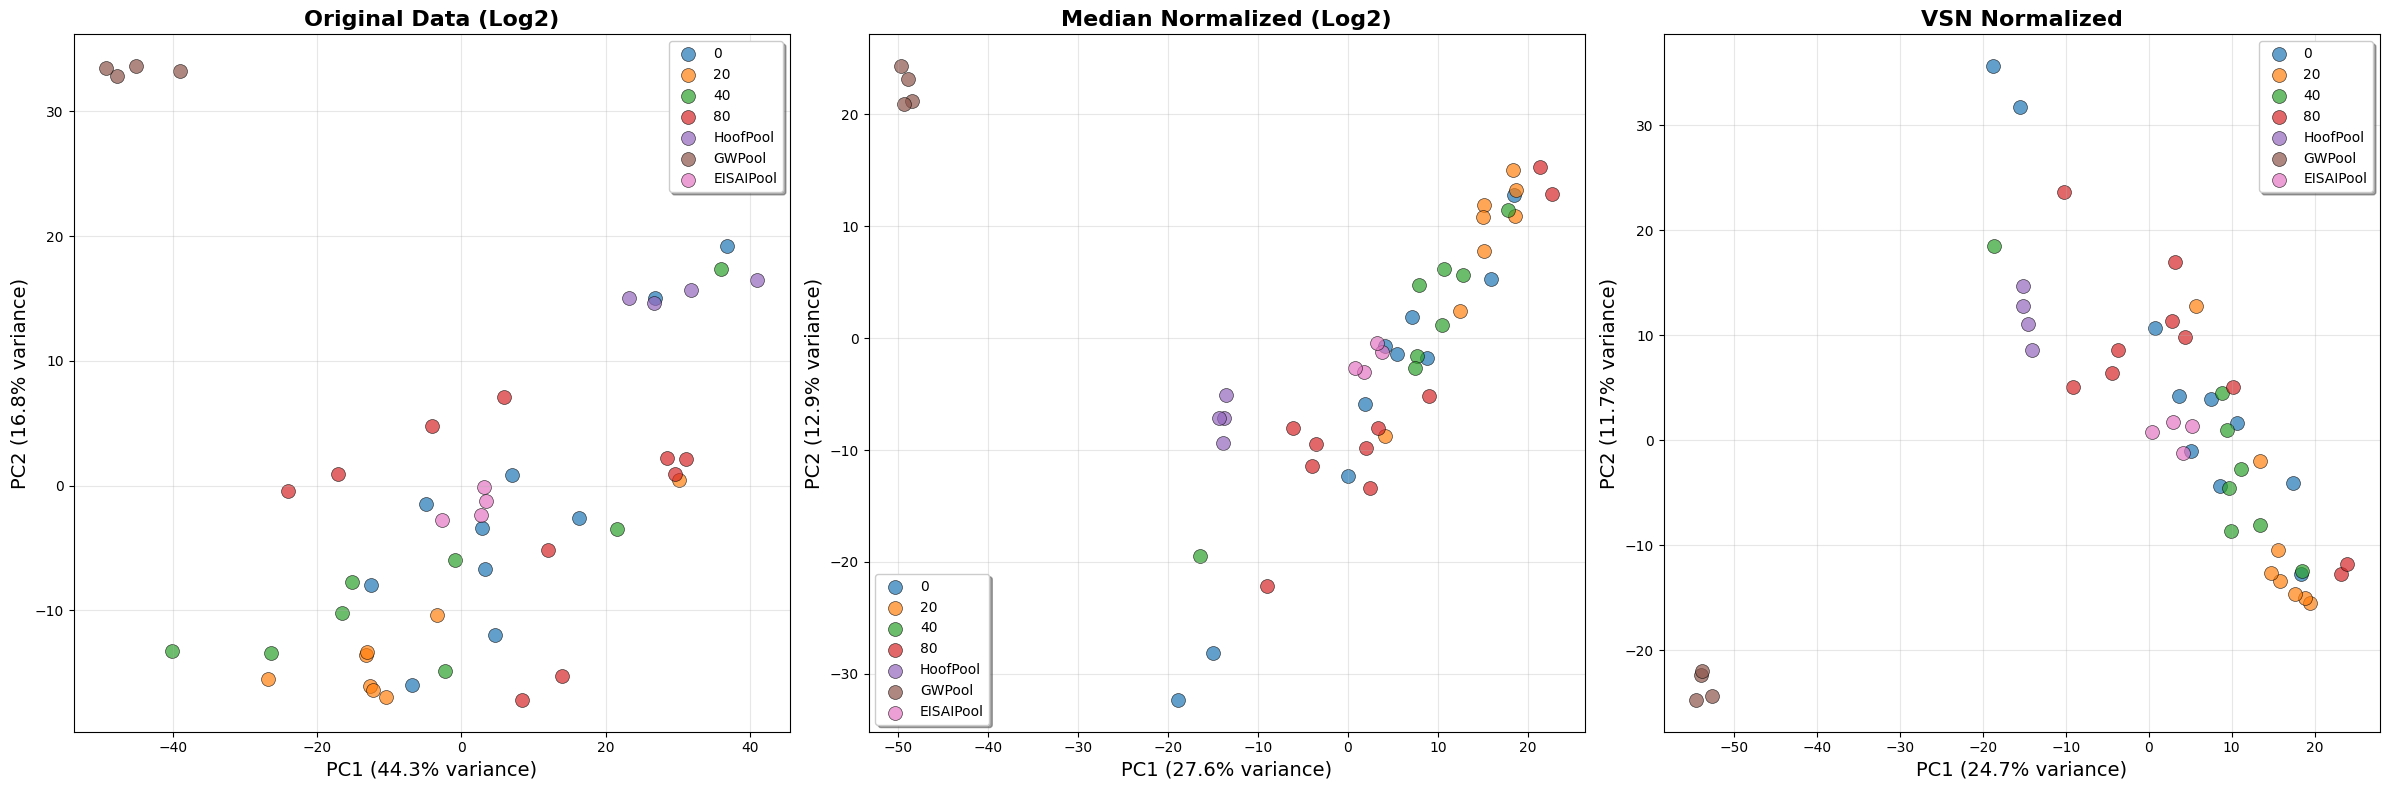


=== PCA SUMMARY STATISTICS ===
**Original Data:**
  PC1 variance: 44.3%
  PC2 variance: 16.8%
  Total variance (PC1-PC2): 61.0%
  Inter-group distance: 31.89 ± 23.16

**Median Normalized:**
  PC1 variance: 27.6%
  PC2 variance: 12.9%
  Total variance (PC1-PC2): 40.5%
  Inter-group distance: 26.09 ± 21.55

**VSN Normalized:**
  PC1 variance: 24.7%
  PC2 variance: 11.7%
  Total variance (PC1-PC2): 36.4%
  Inter-group distance: 28.58 ± 23.46



In [33]:
# 7. PCA Comparison
median_normalized = ptk.normalization.median_normalize(standardized_data, sample_columns=final_sample_columns)
vsn_normalized = ptk.normalization.vsn_normalize(standardized_data, sample_columns=final_sample_columns)

ptk.visualization.plot_comparative_pca(
    original_data=standardized_data,
    median_normalized_data=median_normalized,
    vsn_normalized_data=vsn_normalized,
    sample_columns=final_sample_columns,
    sample_metadata=sample_metadata,
    group_colors=group_colors,
    group_order=list(group_distribution.keys()),
    figsize=(24, 8)
)

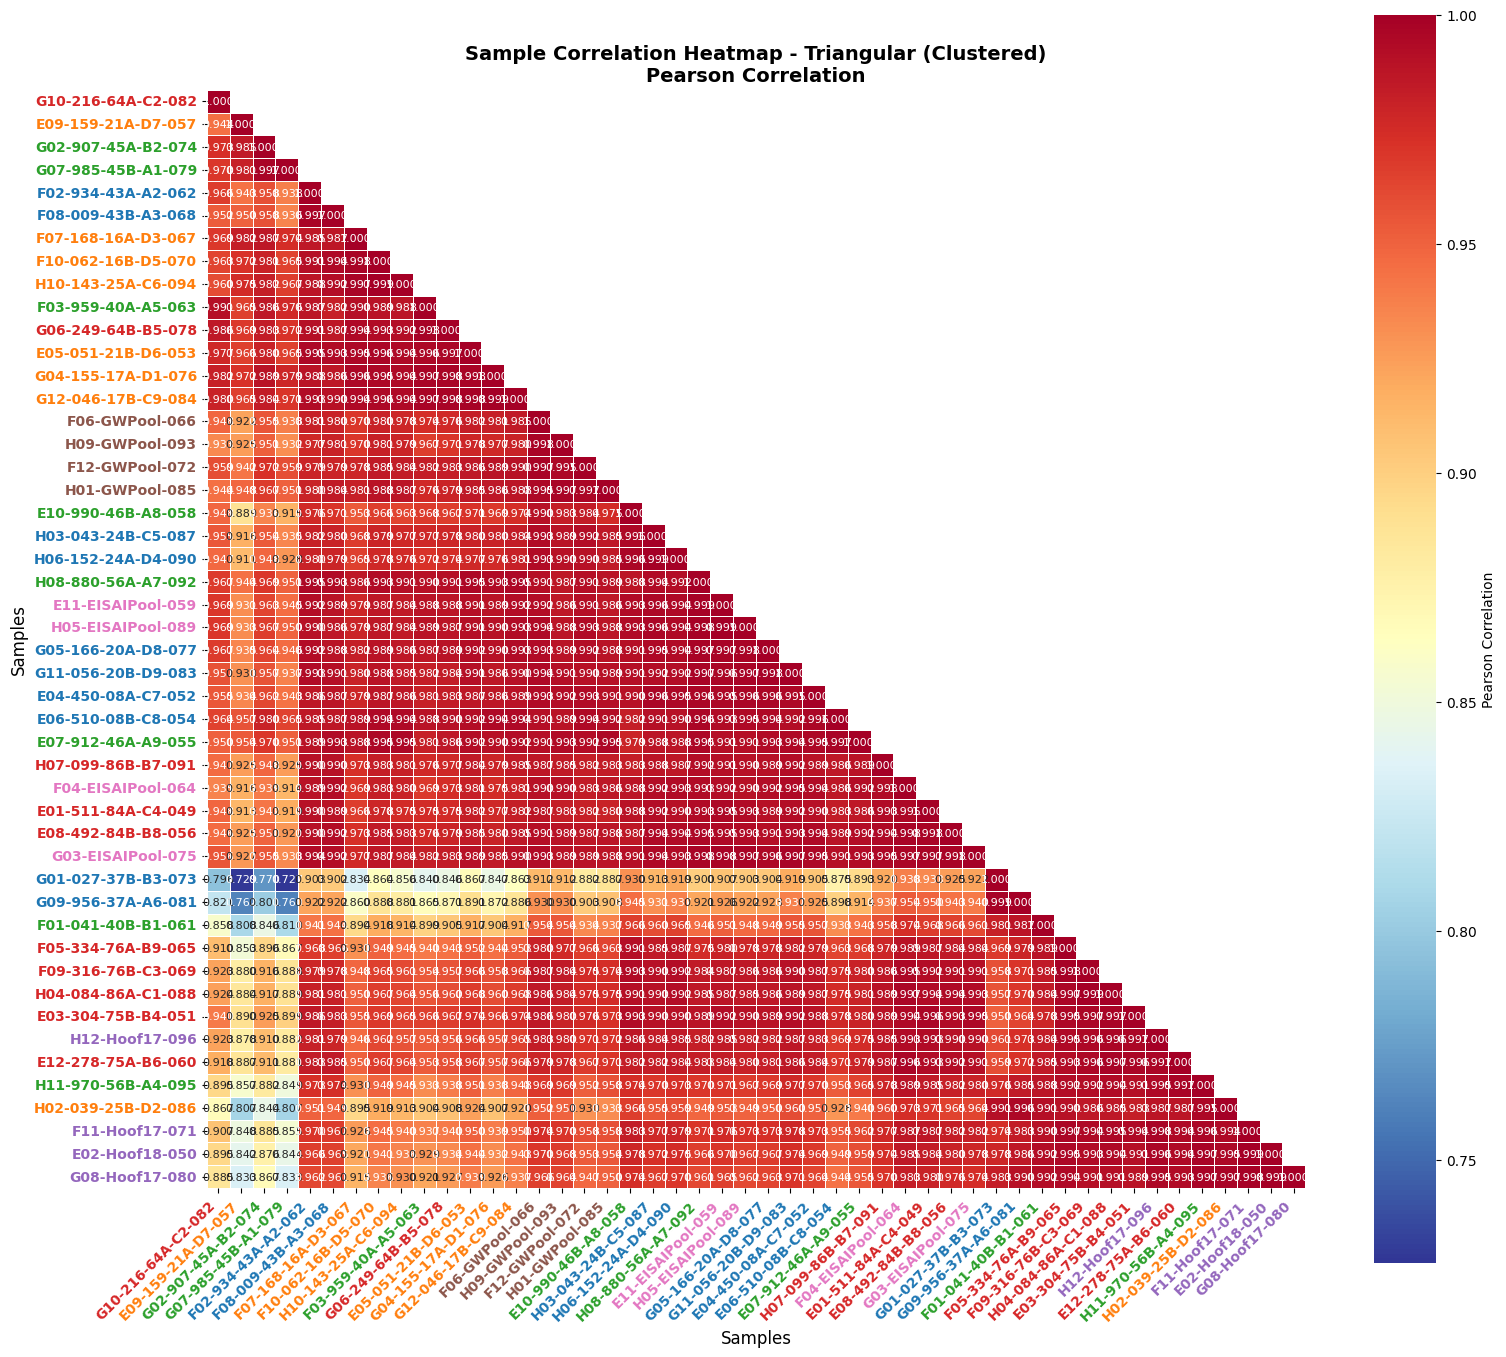


Correlation summary (pearson):
Mean correlation: 0.966
Min correlation: 0.727
Max correlation: 0.999
Correlation range: 0.272

Group composition:
  0: 10 samples
  20: 8 samples
  40: 8 samples
  80: 10 samples
  HoofPool: 4 samples
  GWPool: 4 samples
  EISAIPool: 4 samples


In [34]:
# 8. Correlation Analysis
ptk.visualization.plot_sample_correlation_triangular_heatmap(
    data=normalized_data,
    sample_columns=final_sample_columns,
    sample_metadata=sample_metadata,
    figsize=(16, 14),
    group_colors=group_colors,
    show_clustering=True
)

=== CONTROL CORRELATION ANALYSIS ===

Looking for control samples in column 'Subject' with labels: ['HoofPool', 'GWPool', 'EISAIPool']

Found control samples: ['E02-Hoof18-050', 'E11-EISAIPool-059', 'F04-EISAIPool-064', 'F06-GWPool-066', 'F11-Hoof17-071', 'F12-GWPool-072', 'G03-EISAIPool-075', 'G08-Hoof17-080', 'H01-GWPool-085', 'H05-EISAIPool-089', 'H09-GWPool-093', 'H12-Hoof17-096']
Total control samples: 12

Creating correlation heatmaps...
Using 1319 proteins for Control Samples Correlation
(Original Data) correlation
Using 1319 proteins for Control Samples Correlation
(Median Normalized) correlation
Using 1319 proteins for Control Samples Correlation
(Median Normalized) correlation
Using 1584 proteins for Control Samples Correlation
(VSN Normalized) correlation
Using 1584 proteins for Control Samples Correlation
(VSN Normalized) correlation


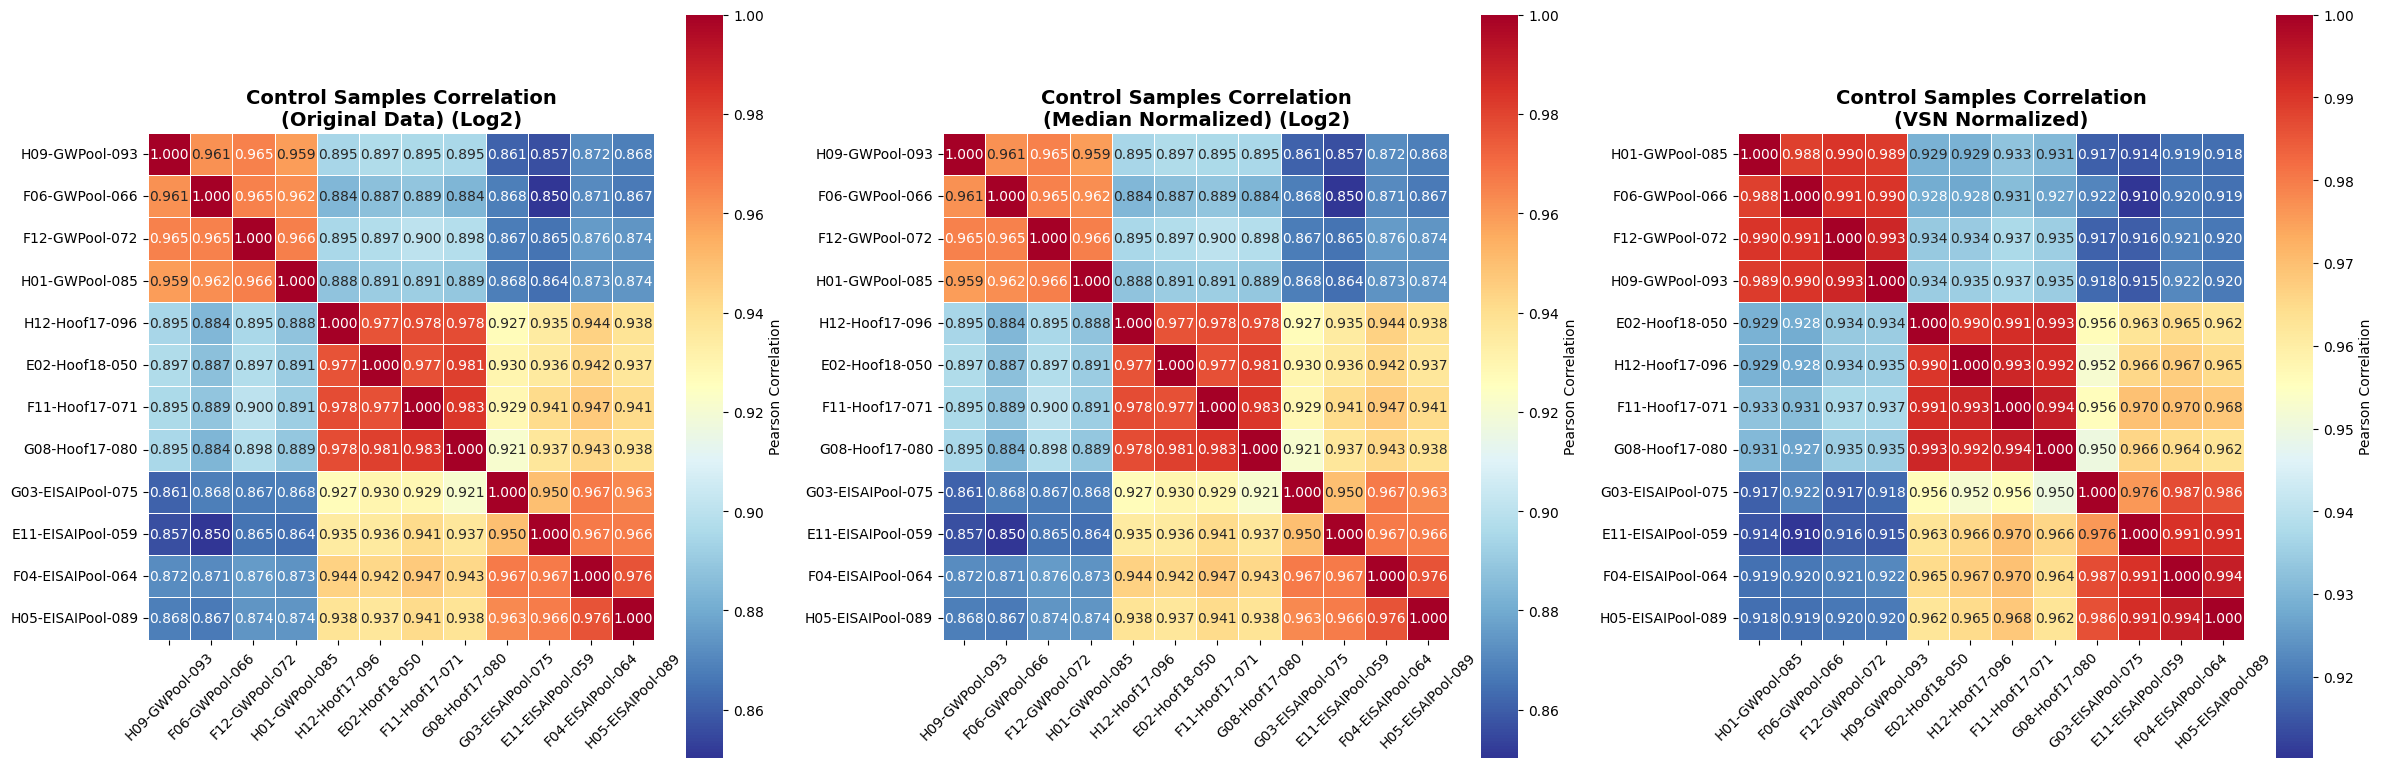


=== CONTROL CORRELATION SUMMARY ===

**Original Data:**
  Mean correlation: 0.918
  Median correlation: 0.924
  Min correlation: 0.850
  Max correlation: 0.983
  High correlation (>0.8): 66/66 (100.0%)

**Median Normalized:**
  Mean correlation: 0.918
  Median correlation: 0.924
  Min correlation: 0.850
  Max correlation: 0.983
  High correlation (>0.8): 66/66 (100.0%)

**VSN Normalized:**
  Mean correlation: 0.952
  Median correlation: 0.951
  Min correlation: 0.910
  Max correlation: 0.994
  High correlation (>0.8): 66/66 (100.0%)


In [35]:
# 8b. Control Sample Correlation Analysis
# Analyze correlation patterns between control samples to evaluate normalization effectiveness
ptk.visualization.plot_control_correlation_analysis(
    original_data=standardized_data,
    median_normalized_data=median_normalized,
    vsn_normalized_data=vsn_normalized,
    sample_columns=final_sample_columns,
    sample_metadata=sample_metadata,
    control_column=control_column,
    control_labels=control_labels,
    figsize=(24, 8)
)


=== INDIVIDUAL CONTROL POOL CORRELATION ANALYSIS (MEDIAN) ===

Analyzing 3 control pools:
  HoofPool: 4 samples - ['E02-Hoof18-050', 'F11-Hoof17-071', 'G08-Hoof17-080', 'H12-Hoof17-096']
  GWPool: 4 samples - ['F06-GWPool-066', 'F12-GWPool-072', 'H01-GWPool-085', 'H09-GWPool-093']
  EISAIPool: 4 samples - ['E11-EISAIPool-059', 'F04-EISAIPool-064', 'G03-EISAIPool-075', 'H05-EISAIPool-089']

--- HoofPool Correlation Analysis ---
Using 1558 proteins for HoofPool


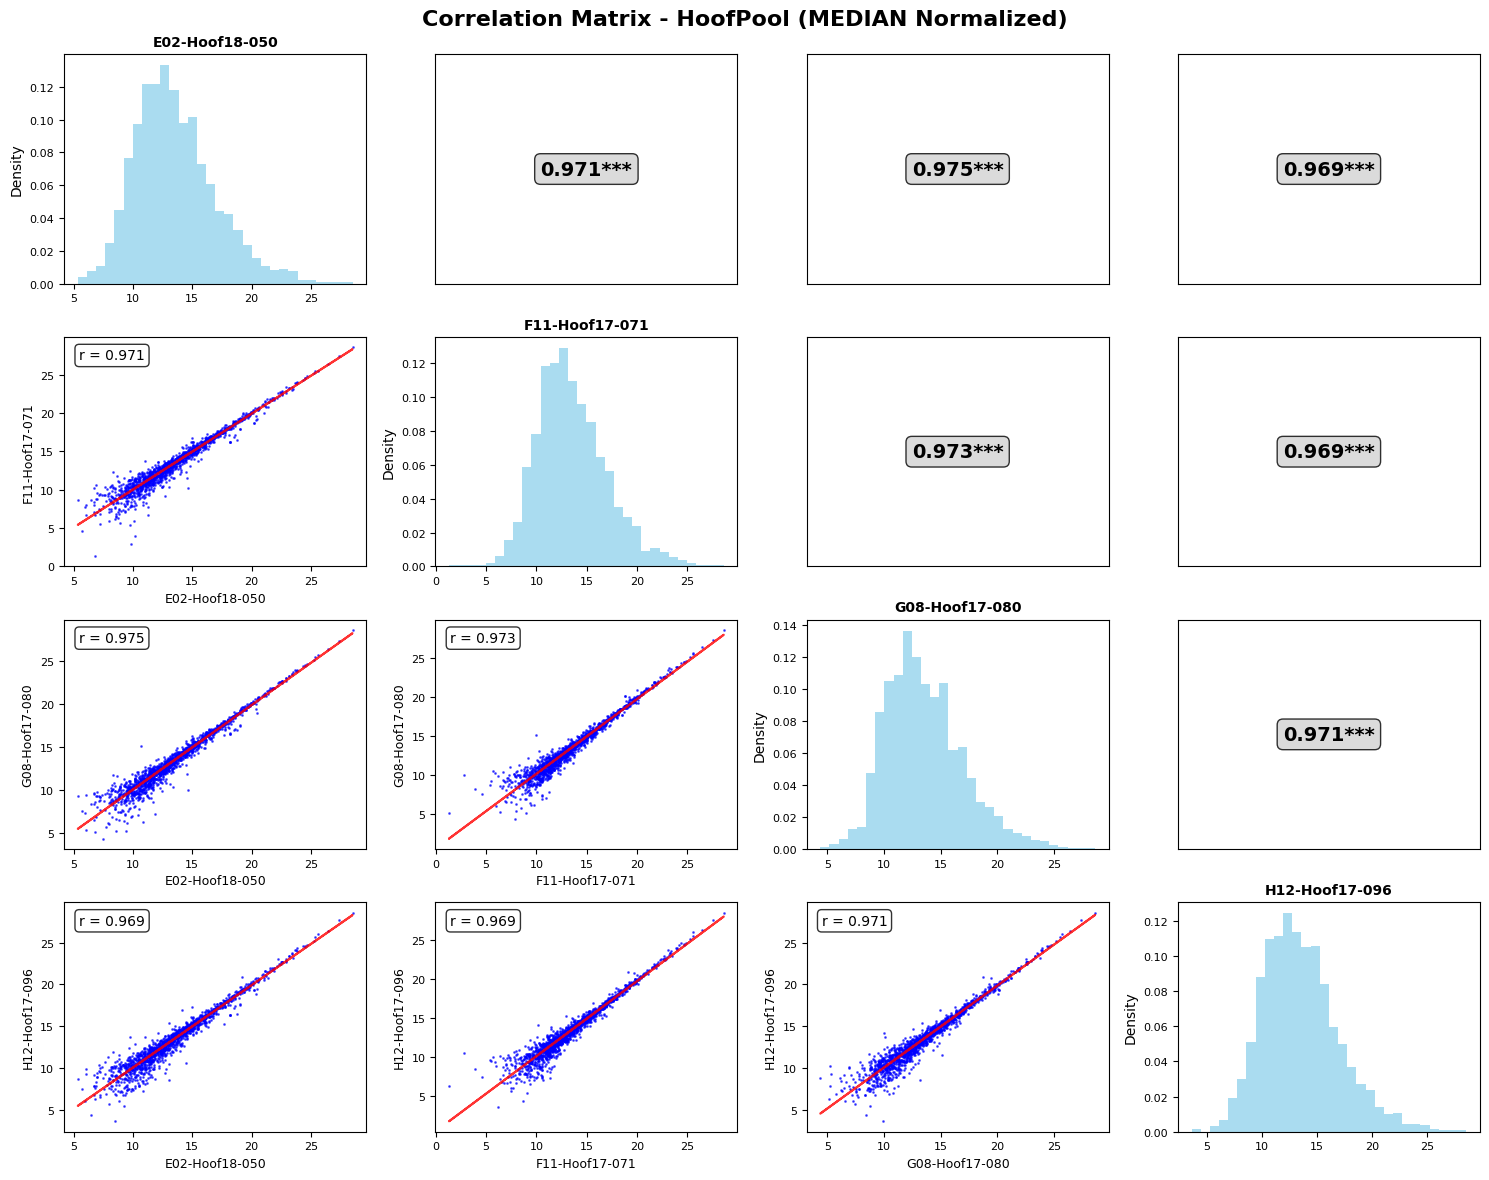


HoofPool Correlation Summary:
  Mean correlation: 0.971
  Median correlation: 0.971
  Min correlation: 0.969
  Max correlation: 0.975
  High correlation (>0.9): 6/6 (100.0%)

HoofPool analysis complete!
--------------------------------------------------

--- GWPool Correlation Analysis ---
Using 1362 proteins for GWPool


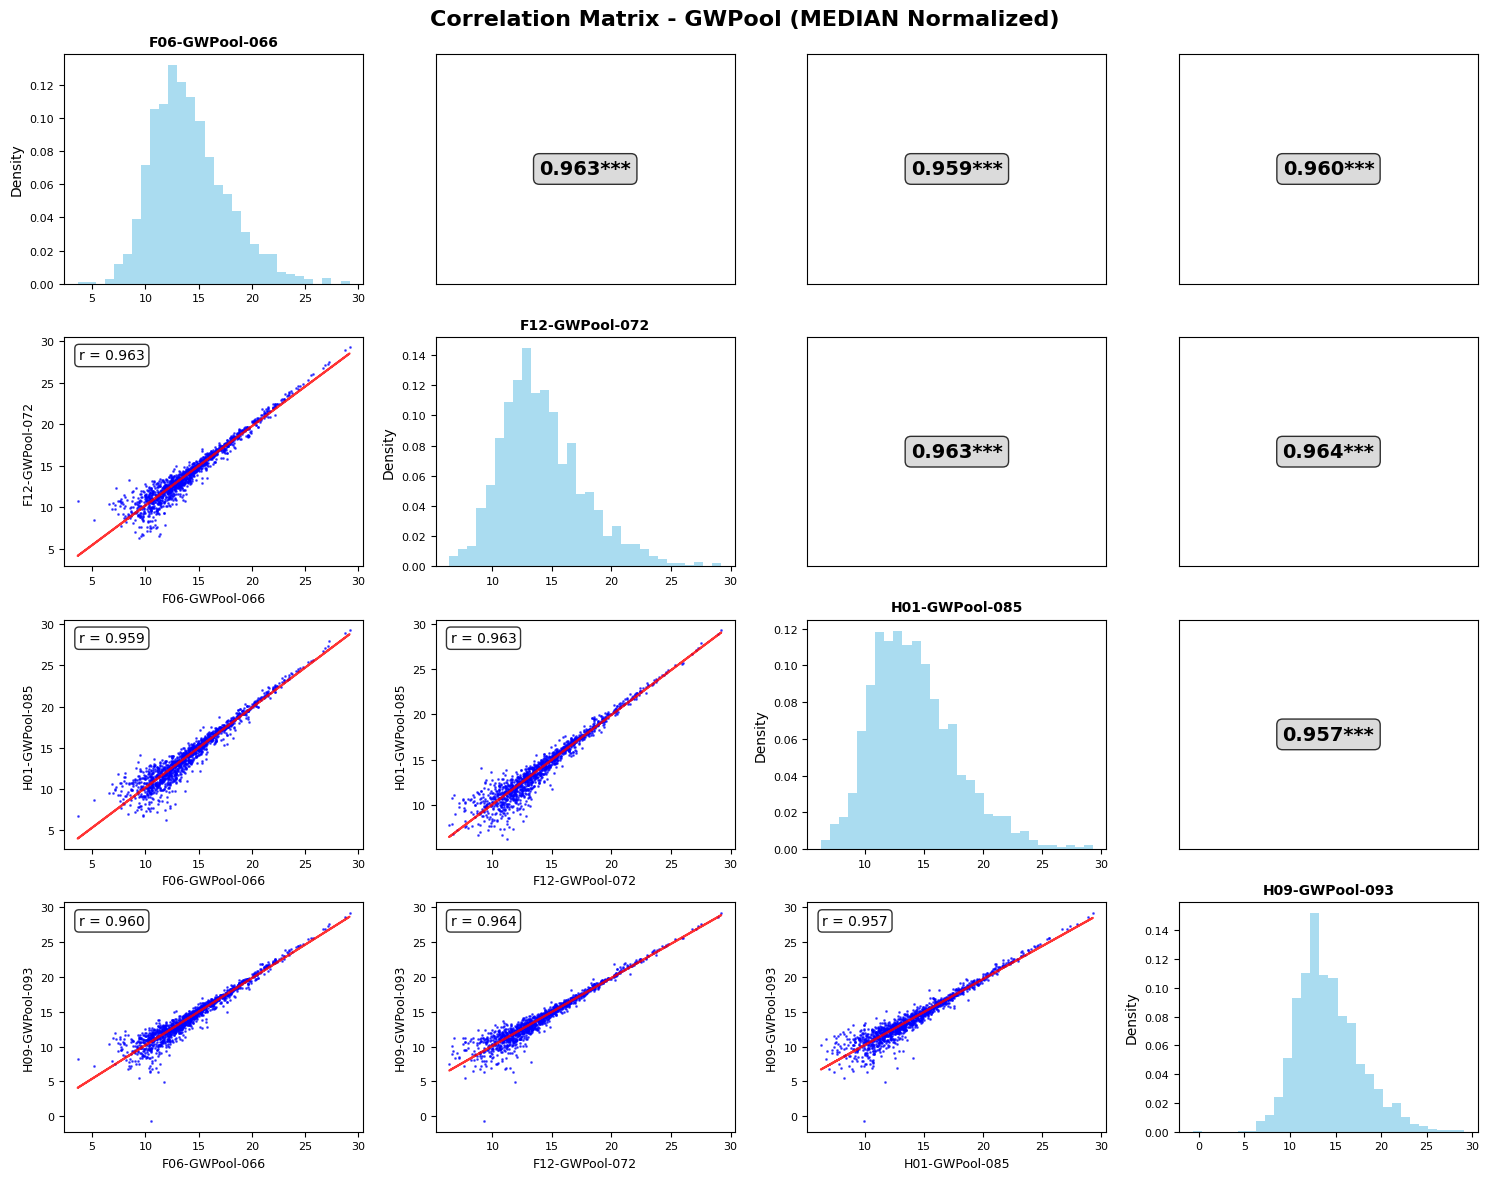


GWPool Correlation Summary:
  Mean correlation: 0.961
  Median correlation: 0.962
  Min correlation: 0.957
  Max correlation: 0.964
  High correlation (>0.9): 6/6 (100.0%)

GWPool analysis complete!
--------------------------------------------------

--- EISAIPool Correlation Analysis ---
Using 1500 proteins for EISAIPool


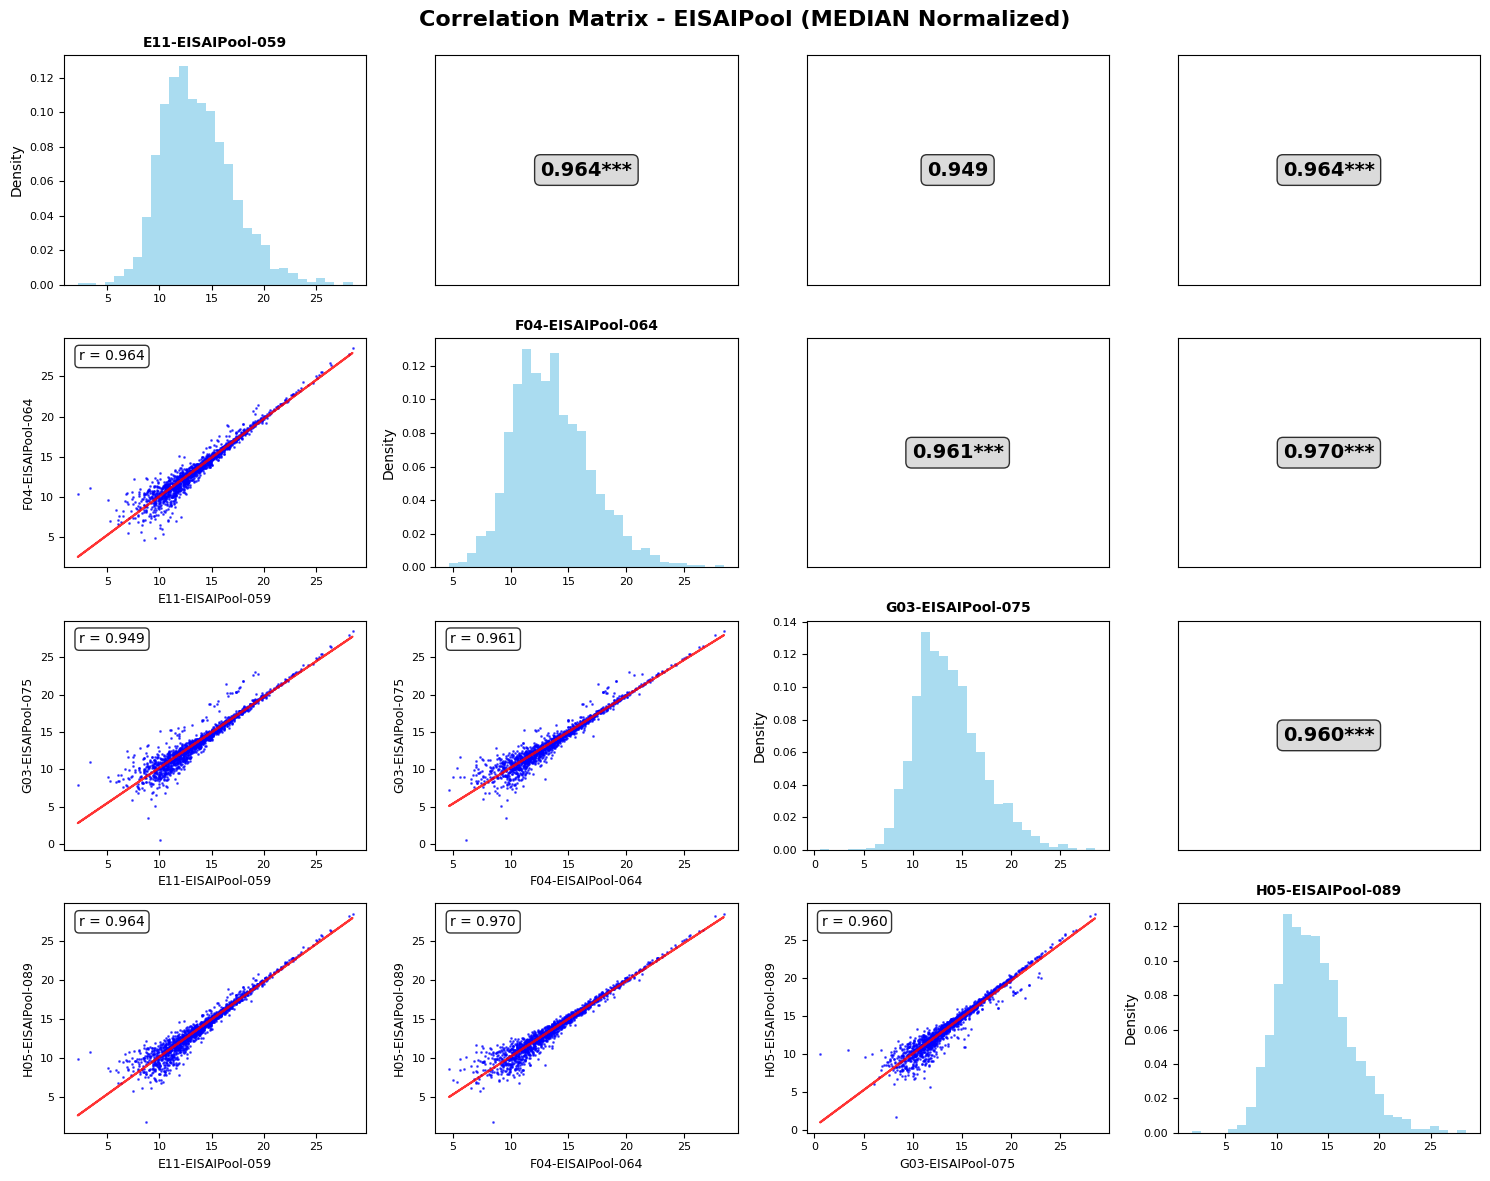


EISAIPool Correlation Summary:
  Mean correlation: 0.961
  Median correlation: 0.962
  Min correlation: 0.949
  Max correlation: 0.970
  High correlation (>0.9): 6/6 (100.0%)

EISAIPool analysis complete!
--------------------------------------------------


In [36]:
# 8c. Individual Control Pool Analysis
# Detailed correlation analysis for each specific control pool type
ptk.visualization.plot_individual_control_pool_analysis(
    data=normalized_data,
    sample_columns=final_sample_columns,
    sample_metadata=sample_metadata,
    control_column=control_column,
    control_labels=control_labels,
    normalization_method=normalization_method.upper(),
    figsize=(15, 12)
)

In [37]:
# 9. Statistical Analysis
config = ptk.statistical_analysis.StatisticalConfig()

# Basic analysis settings
config.statistical_test_method = statistical_test_method
config.analysis_type = analysis_type
config.p_value_threshold = p_value_threshold
config.fold_change_threshold = fold_change_threshold

# Log transformation configuration (handled by toolkit)
config.log_transform_before_stats = log_transform_before_stats
config.log_base = log_base
config.log_pseudocount = log_pseudocount
config.normalization_method = normalization_method.lower()

# Experimental design
config.subject_column = subject_column
config.paired_column = paired_column
config.paired_label1 = paired_label1
config.paired_label2 = paired_label2
config.group_column = group_column
config.group_labels = group_labels

# Mixed-effects configuration
config.interaction_terms = interaction_terms
config.additional_interactions = additional_interactions
config.covariates = covariates

# P-value selection configuration
config.use_adjusted_pvalue = use_adjusted_pvalue
config.enable_pvalue_fallback = enable_pvalue_fallback

print(f"Running {statistical_test_method} analysis...")
if statistical_test_method == "mixed_effects":
    print(f"  Interactions: {interaction_terms + additional_interactions}")
    if covariates:
        print(f"  Covariates: {covariates}")
    print(f"  DrugDose treatment: {'categorical' if FORCE_CATEGORICAL else 'continuous'}")

differential_results = ptk.statistical_analysis.run_comprehensive_statistical_analysis(
    normalized_data=normalized_data,
    sample_metadata=sample_metadata,
    config=config,
    protein_annotations=filtered_data
)

# Analysis summary
analysis_summary = ptk.statistical_analysis.display_analysis_summary(
    differential_results=differential_results,
    config=config,
    label_top_n=label_top_proteins
)

print(f"✓ Statistical analysis complete: {len(differential_results)} proteins analyzed")
display(differential_results[['Gene', 'Protein', 'logFC', 'P.Value', 'adj.P.Val']].head(10))

Running mixed_effects analysis...
  Interactions: ['DrugDose', 'Visit']
  DrugDose treatment: continuous
COMPREHENSIVE STATISTICAL ANALYSIS
Log transformation: AUTO-DETECTED (needed - median preserves original scale)
Applying log2 transformation for statistical analysis...
  -> Applied log2 transformation with pseudocount 0.1
  -> New data range: -3.32 to 29.73
  -> New mean: 13.08
Step 1: Cleaning and validating sample metadata...
  Using standardized data structure: 48 sample columns (columns 6+)
  Sample columns: ['E01-511-84A-C4-049', 'E02-Hoof18-050', 'E03-304-75B-B4-051']...
Preparing metadata for 48 samples...
  Before filtering: 48 samples
  Removed 12 samples missing Visit
  After filtering: 36 samples
  Subjects: 18
  Groups: {80.0: 10, 0.0: 10, 20.0: 8, 40.0: 8}
  Timepoints: {'D-02': 18, 'D-13': 18}

Step 2: Analyzing experimental design...
  Valid experimental samples: 0
  Complete paired subjects by group:
    0: 0 subjects
    20: 0 subjects
    40: 0 subjects
    80: 0 

,Gene,Protein,logFC,P.Value,adj.P.Val
668,SCRG1,sp|O75711|SCRG1_HUMAN,0.009098,0.000166,0.263357
378,EPHA10,sp|Q5JZY3|EPHAA_HUMAN,-0.015691,0.000836,0.662246
357,CEP192,sp|Q8TEP8|CE192_HUMAN,0.007114,0.002450,1.000000
427,CA11,sp|O75493|CAH11_HUMAN,0.012693,0.005459,1.000000
1188,ADGRG1,sp|Q9Y653|AGRG1_HUMAN,-0.013950,0.006568,1.000000
1473,TNR,sp|Q92752|TENR_HUMAN,0.005475,0.007050,1.000000
64,GLDN,sp|Q6ZMI3|GLDN_HUMAN,0.013861,0.008114,1.000000
1070,PCDHGC5,sp|Q9Y5F6|PCDGM_HUMAN,0.006008,0.009414,1.000000
1212,MSN,sp|P26038|MOES_HUMAN,0.005675,0.009939,1.000000
1397,ITM2B,sp|Q9Y287|ITM2B_HUMAN,0.012201,0.012108,1.000000


⚠️  No significant proteins found using adjusted p-values (FDR < 0.05)
📊 Automatically falling back to unadjusted p-values for visualization
    Note: Results shown use raw p-values, interpret with caution

Volcano Plot: MIXED_EFFECTS Analysis


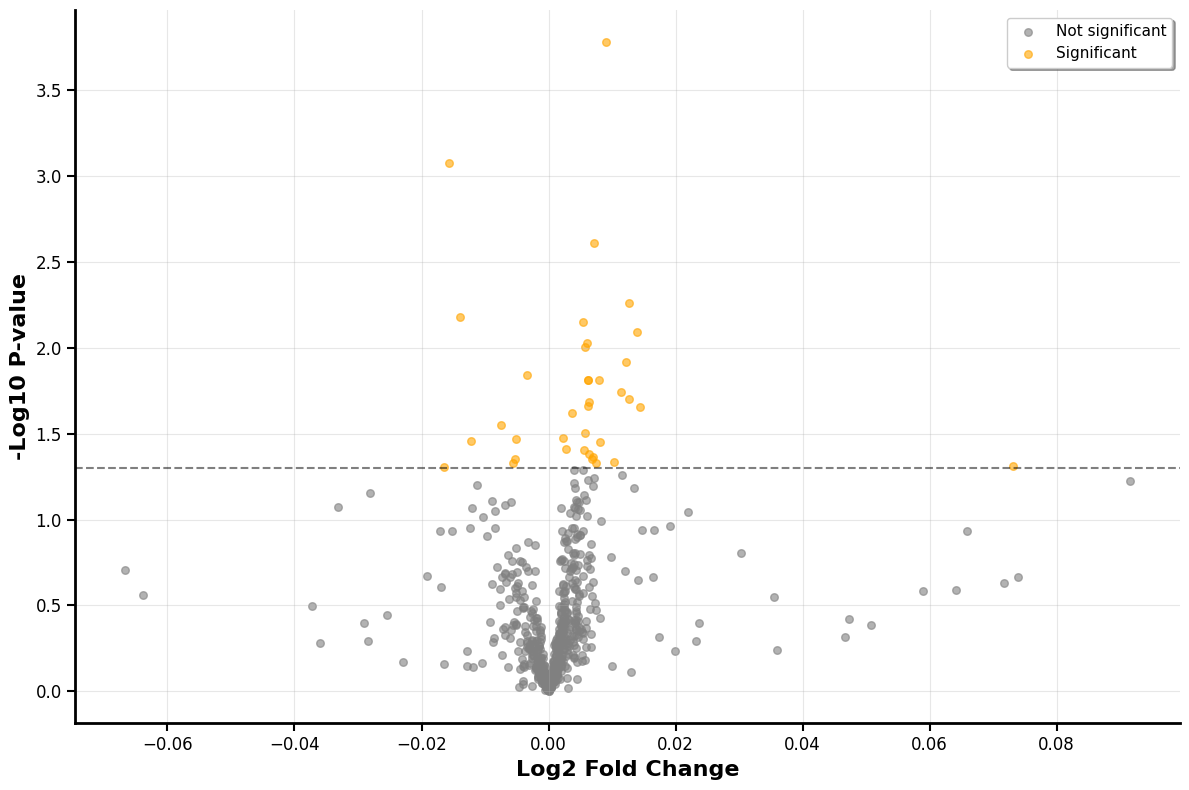

Volcano plot summary:
Total proteins: 1584
P-value type used: P-value (fallback from FDR)
Significant (P-value < 0.05): 37
Up-regulated (FC > 1.5, P-value < 0.05): 0
Down-regulated (FC < -1.5, P-value < 0.05): 0


In [38]:
# 10. Volcano Plot
ptk.visualization.plot_volcano(
    differential_df=differential_results,
    fc_threshold=fold_change_threshold,
    p_threshold=p_value_threshold,
    figsize=(12, 8),
    title=f'Volcano Plot: {statistical_test_method.upper()} Analysis',
    label_top_n=label_top_proteins,
    use_adjusted_pvalue=use_adjusted_pvalue,
    enable_pvalue_fallback=enable_pvalue_fallback,
    normalization_method=normalization_method
)

In [30]:
# 11. Export Results
config_dict = ptk.export.create_config_dict_from_notebook_vars(
    # Input files
    toolkit_path=toolkit_path,
    metadata_file=metadata_file,
    protein_file=protein_file,
    remove_common_prefix=remove_common_prefix,
    
    # Data filtering
    min_detection_rate=min_detection_rate,
    
    # Normalization
    normalization_method=normalization_method,
    optimize_vsn=optimize_vsn,
    
    # Negative value handling
    handle_negatives=handle_negatives,
    negative_handling_method=negative_handling_method,
    min_positive_replacement=min_positive_replacement,
    
    # Log transformation
    log_transform_before_stats=log_transform_before_stats,
    log_base=log_base,
    log_pseudocount=log_pseudocount,
    
    # Statistical analysis
    statistical_test_method=statistical_test_method,
    analysis_type=analysis_type,
    
    # Experimental design
    subject_column=subject_column,
    paired_column=paired_column,
    paired_label1=paired_label1,
    paired_label2=paired_label2,
    group_column=group_column,
    group_labels=group_labels,
    FORCE_CATEGORICAL=FORCE_CATEGORICAL,
    
    # Mixed-effects model
    interaction_terms=interaction_terms,
    additional_interactions=additional_interactions,
    covariates=covariates,
    
    # Control samples
    control_column=control_column,
    control_labels=control_labels,
    
    # Visualization
    use_systematic_colors=use_systematic_colors,
    systematic_color_palette=systematic_color_palette,
    
    # Significance thresholds
    p_value_threshold=p_value_threshold,
    fold_change_threshold=fold_change_threshold,
    q_value_max=q_value_max,
    use_adjusted_pvalue=use_adjusted_pvalue,
    enable_pvalue_fallback=enable_pvalue_fallback,
    
    # Output settings
    export_results=export_results,
    output_prefix=output_prefix,
    label_top_proteins=label_top_proteins,
    random_seed=random_seed,
    min_samples_per_group=min_samples_per_group,
    
    # Additional computed values
    final_sample_columns=final_sample_columns
)

exported_files = ptk.export.export_complete_analysis(
    normalized_data=normalized_data,
    sample_metadata=sample_metadata,
    config_dict=config_dict,
    differential_results=differential_results,
    filtered_data=filtered_data,
    output_prefix=output_prefix,
    analysis_description="Minimal dose-response analysis with comprehensive configuration"
)

print(f"✓ Analysis complete! Results exported with prefix: {output_prefix}")
print("Files created:", exported_files if exported_files else "Export files list not available")

Exporting analysis results...
Creating CLEAN normalized data with proper column ordering...
Using standardized structure: 48 sample columns (columns 6+)
✓ Added: Protein
✓ Added: Description
✓ Added: Protein Gene
✓ Added: UniProt_Accession
✓ Added: UniProt_Entry_Name
✓ Final column order: 5 annotations + 48 samples
✓ CLEAN structure: No redundant or scattered columns!
✓ Column order: ['Protein', 'Description', 'Protein Gene', 'UniProt_Accession', 'UniProt_Entry_Name']... + 48 sample columns
✓ NO redundant columns like 'Gene', 'UniProt_Database', extra 'Description' etc.
Normalized data (with annotations) exported to: EISAI-Minimal-Analysis_normalized_data.csv
Sample metadata exported to: EISAI-Minimal-Analysis_sample_metadata.csv
Adding annotation columns: ['Protein', 'Description', 'Protein Gene', 'UniProt_Accession', 'UniProt_Entry_Name']
Differential analysis results (with annotations) exported to: EISAI-Minimal-Analysis_differential_results_annotated.csv

Exported results preview (

,Protein,Gene,logFC,P.Value,adj.P.Val
0,sp|O75711|SCRG1_HUMAN,SCRG1,0.009098,0.000166,0.263357
1,sp|Q5JZY3|EPHAA_HUMAN,EPHA10,-0.015691,0.000836,0.662246
2,sp|Q8TEP8|CE192_HUMAN,CEP192,0.007114,0.002450,1.000000


Exporting analysis configuration to: EISAI-Minimal-Analysis_config_20250903_102714.py

✓ All analysis results and configuration exported successfully!
Files created:
  • EISAI-Minimal-Analysis_normalized_data.csv - Normalized protein data
  • EISAI-Minimal-Analysis_sample_metadata.csv - Sample metadata
  • EISAI-Minimal-Analysis_differential_results_annotated.csv - Differential results with annotations
  • EISAI-Minimal-Analysis_config_20250903_102714.py - Python configuration (timestamped)

CONFIGURATION REPRODUCIBILITY:
The complete analysis configuration has been saved as a Python file
with timestamp for easy identification and reuse:

Python Configuration (timestamped):
   EISAI-Minimal-Analysis_config_20250903_102714.py
   - Complete analysis settings in Python format
   - Ready to copy variables to recreate this exact analysis
   - Easy to parse, edit, and version control
   - Can be imported: exec(open('config_file.py').read())

Annotated Results:
   EISAI-Minimal-Analysis_diffe